In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
#import matplotlib.dates as mdate


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# ----Added
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

In [15]:
# Calculate the date one year from the last date in data set.
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
date_year_ago

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
dp = [Measurement.date, Measurement.prcp]
date_prec = session.query(*dp).filter(Measurement.date >= date_year_ago).all()
date_prec 

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prec_df = pd.DataFrame(date_prec, columns=['Date', 'precipitation'])
date_prec_df.head(20)

,Date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [18]:
# Sort the dataframe by date
date_prec_df = date_prec_df.sort_values(["Date"])
date_prec_df.head(15)

,Date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


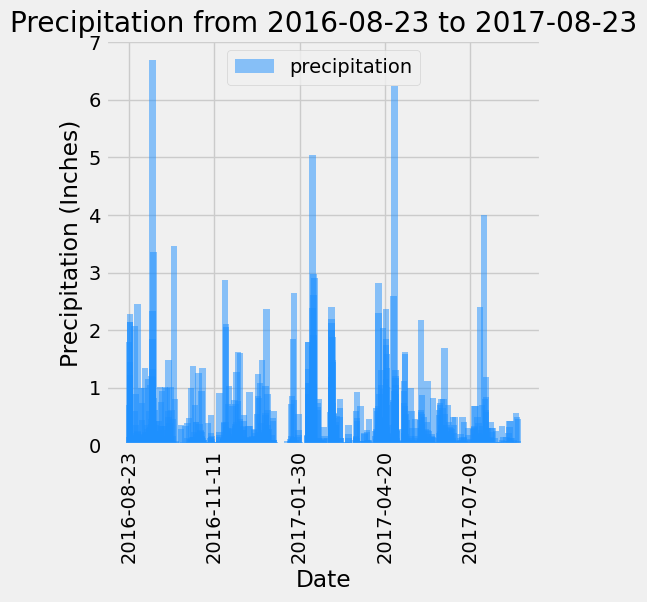

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
x = date_prec_df['Date'].to_list()
y = date_prec_df['precipitation'].to_list()
plt.figure(figsize= (5,5))
plt.bar(x, y, width = 6, color='dodgerblue', alpha = 0.5, align= 'center', label="precipitation")
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks, rotation = 90)
plt.title(f'Precipitation from {date_year_ago} to {recent_date[0]}')
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.grid(which= 'major', axis= 'both', linestyle ='-')
plt.legend(loc= "upper center")
plt.show()



In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prec_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
lists = [Measurement.station, func.count(Measurement.id)]

most_active_station =session.query(*lists).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# List the stations and their counts in descending order.
lists = [Measurement.station, func.count(Measurement.id)]
most_active = session.query(*lists).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
print(f"Station {most_active[(0)]} has the most rows.")


Station USC00519281 has the most rows.


In [24]:
lists = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
most_active_temp = session.query(*lists).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
most_active_temp

(54.0, 85.0, 71.66378066378067)

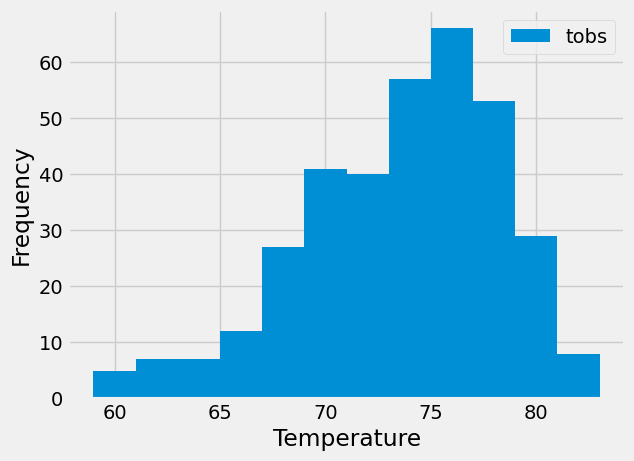

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp = session.query(Measurement.tobs).filter(Measurement.station == most_active_station[0][0]).filter(Measurement.date >= date_year_ago).all()

# temperature dataframe
temp_df = pd.DataFrame(temp, columns=['Temperature'])
#temp_df.head()

# Plot the results as a histogram
plt.hist(temp_df['Temperature'], bins=12, label = 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# Close Session

In [26]:
# Close Session
session.close()